# Ayurvedic Prakruti Classification using DNA Sequencing with Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dataset.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[['GGCGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGAGAGATGAAGAGCTTGCTCTTCAAATCGAGTGGCGAACGGGTGAGTAACGCGTGAGGAACCTGCCTCAAAGAGGGGGAGCAACAGTTGGAAACGACTGCTAATACCGCATAAGCCCACAGCTCGGCATCGAGCAGAGGGAAAAGGAGTAATCCGCTTTGAGATGGCCTCGCGTCCGATTAGCTAGTTGGTGAGGTAACGGCCCACTAAGGCGACGATCGGTAGCCGGACTGAGAGGTTGAACGGCCACATTGGGACCGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCGTAGCATGCAGCGACGCCGCCGTGGAGGAAGAAGGTCTTCGGATTGTAAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAAAACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGATGGAAGTGAAATCCATGGGCTCAACTCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAACAGGATTAGATACCCTGGTAGT']
 ['GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGATTCTCTTCGGAGAAGAGCGGCGGACGGGTGAGTAACGCGTGGGTAACCTGCCCTGTACACACGGATAACATACCGAAAGGTATGCTAATACGAGATAATATGCTTTTATCGCATGGTAGAAGTATCAAAGCTTTTGCGGTACAGGATGGACCCGCGTCTGATTAGCTAGTTGGTAAGGTAACGGCTTAC

In [4]:
print(y)

['Kapha' 'Kapha' 'Kapha' ... 'Pitta' 'Pitta' 'Pitta']


# Label Encoding Dependent Variable (Ayurvedic Prakruti)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
print(y)

[0 0 0 ... 1 1 1]


# Treating DNA sequence as a "language", otherwise known as k-mer counting

### A function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [7]:
def getKmers(sequence,size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

## Now we can convert our training data sequences into short overlapping k-mers of length 6

In [8]:
kmerData = []

for i in x:
    kmerData.append(getKmers(str(i)))

In [9]:
print(kmerData[111])

["['gatg", "'gatga", 'gatgaa', 'atgaac', 'tgaacg', 'gaacgc', 'aacgct', 'acgcta', 'cgctag', 'gctagc', 'ctagct', 'tagcta', 'agctac', 'gctaca', 'ctacag', 'tacagg', 'acaggc', 'caggct', 'aggctt', 'ggctta', 'gcttaa', 'cttaac', 'ttaaca', 'taacac', 'aacaca', 'acacat', 'cacatg', 'acatgc', 'catgca', 'atgcaa', 'tgcaag', 'gcaagt', 'caagtc', 'aagtcg', 'agtcga', 'gtcgag', 'tcgagg', 'cgaggg', 'gagggg', 'agggga', 'ggggaa', 'gggaaa', 'ggaaac', 'gaaacg', 'aaacga', 'aacgat', 'acgata', 'cgatag', 'gatagc', 'atagcg', 'tagcga', 'agcgaa', 'gcgaaa', 'cgaaag', 'gaaagc', 'aaagct', 'aagctt', 'agcttg', 'gcttgc', 'cttgct', 'ttgctt', 'tgcttt', 'gctttt', 'cttttt', 'tttttc', 'ttttct', 'tttcta', 'ttctag', 'tctagg', 'ctaggc', 'taggcg', 'aggcgt', 'ggcgtc', 'gcgtcg', 'cgtcga', 'gtcgac', 'tcgacc', 'cgaccg', 'gaccgg', 'accggc', 'ccggcg', 'cggcgc', 'ggcgca', 'gcgcac', 'cgcacg', 'gcacgg', 'cacggg', 'acgggt', 'cgggtg', 'gggtga', 'ggtgag', 'gtgagt', 'tgagta', 'gagtaa', 'agtaac', 'gtaacg', 'taacgc', 'aacgcg', 'acgcgt', 'cgcgta',

In [10]:
text_data = []

for i in range(len(kmerData)):
    text_data.append("");
    for item in kmerData[i]:
        text_data[i] = text_data[i] + ' ' + item
    
for i in range(len(text_data)):
    text_data[i] = text_data[i][9:-8]

In [11]:
print(text_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Now we will apply the BAG of WORDS using CountVectorizer using Natural Language Processing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(text_data)

In [13]:
print(X.shape)

(3003, 51057)


### Checking weather the dataset is balanced or not

<AxesSubplot:>

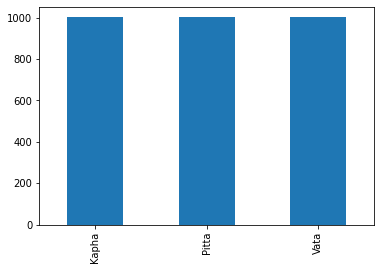

In [14]:
dataset['Prakruti'].value_counts().sort_index().plot.bar()

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)

(2402, 51057)
(601, 51057)


### Creating a multinomial naive Bayes classifier 

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [18]:
y_pred = classifier.predict(X_test)

## Checking Accuracy of Modal using some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score.

In [19]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
def get_metrics(y_test,y_predicted):
    accuracy = accuracy_score(y_test,y_predicted)
    precision = precision_score(y_test,y_predicted,average="weighted")
    recall = recall_score(y_test,y_predicted,average="weighted")
    f1 = f1_score(y_test,y_predicted,average="weighted")
    return accuracy , precision,recall,f1
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          165   33   16
1            0  175   34
2            5   26  147
accuracy = 0.810 
precision =0.827 
recall =0.810 
f1 =0.813


### Creating a k_nearest_neighbors classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          201    9    4
1            3  203    3
2            9    7  162
accuracy = 0.942 
precision =0.942 
recall =0.942 
f1 =0.942


###  Creating a support_vector_machine classifier

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          201    9    4
1            0  207    2
2            6    4  168
accuracy = 0.958 
precision =0.959 
recall =0.958 
f1 =0.958


### Creating a decision_tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          196   10    8
1            4  202    3
2            8   14  156
accuracy = 0.922 
precision =0.923 
recall =0.922 
f1 =0.922


### Creating a random_forest classifier 

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1    2
Actual                  
0          205    7    2
1            1  204    4
2            7    7  164
accuracy = 0.953 
precision =0.954 
recall =0.953 
f1 =0.953
